# Joy Module

- Author: Youngsup Kim, idebtor@gmail.com
- 2018.03.01 - creation
- 2018.04.08 - handles an array of weights W, X0 options
- 2018.04.18 - works with plot_decision_regions
- 2018.05.30 - mnist data read/write/show implemented

# Functions and Classes

```
- def iris_data(standardized=False, shuffled=False): 
- def joy_data(standardized=False, shuffled=False):
    - joy_data.txt 파일을 읽어옴. 
    - joydata.txt파일과는 달리 두 개의 classes로 선형 분류 가능함
- def joydata(standardized=False, shuffled=False):
    - joydata.txt 파일을 읽어옴.
    - joy_data.txt파일과는 달리 한 개의 data가 Noise로 섞여있어서, 
      선형 분류가 가능하지 않음.
- def joy_Ndata(standardized=False, shuffled=False):
    - joy_dataNoise.txt 파일을 읽어옴.
- def toy_data(standardized=False, shuffled=False):
- def getXy(filename, bipolar=True, standardized=False, shuffled=False):

- def planar_data():
- def noisy_circles():
- def noisy_moons():
- def blobs():
- def gaussian_quantiles():

- def load_mnist(normalize=True, flatten=True):
    - MNIST 데이터셋을 메모리로 빠르게 읽어 옮(pickle을 사용함)
    - 현재 실행 위치에서 "data" 폴더에 MNIST 데이터셋이 존재하지 않으면 다운로드를 시도함.
    - (Xtrain, ytrain), (Xtest, ytest) 두 튜플로 반환함. 
    - normalized가 True이면, Xtrain/Xtest의 값은 0 ~ 1 사이 값으로 정규화함. 
    - flatten가 True이면, Xtrain/Xtest는 (m, 784), False이면 Xtrain/Xtest는 (m, 28, 28)으로 반환

- def append_mnist_rotation(X, y, n_images, degree): <br>
    - 학습자료 X(m, 768)에서 n_images를 무작위로 선택하여 degree만큼 회전하고, X에 추가함. 
    - X(m+n_images, 768), y(m + n_images,)를 반환
    
- def read_mnist_csv(filename, display = True):
    - Reads the MNSIT csv file and returns X and y
- def save_mnist_csv(X, y, filename):
    - Saves X, y into csv type file.

- def show_mnist(image, inverted = False):
- def show_mnist_grid(images, inverted = False, figsize = 10, ncols=10, maxgrid = 100):

- def sigmoid(x):
- def one_hot_encoding(y, n_y):
- def one_hot_decoding(yhot):

- def plot_xyw(x, y, W=None, X0=False, title='Perceptron', annotate=False, savefig=None):
- def plot_xyc(x, y, clf=None, X0=False, annotate=False, savefig=None, xylabels=("x1", "x2")):
- def plot_decision_regions(X, y, classifier, resolution=0.02):
- def plot_decision_boundary(X, y, predict):

- class Perceptron(object):
- class AdalineGD(object):
- class AdalineSGD(object):

- class NeuralNetwork():
    - This class implements a three layer mneural net with backpropagation.  
    
- class LogisticNeuron(object):
    """ implements logistic regression using cross entropy""" 
    
- class LogisticNeuron_stochastic(object):
    """implements Logistic Regression using cross entropy with stochastic gradient descent"""

```



For line number displayed in a cell, use `<esc> L`

If you want line numbers __only for code cells__, there is a simpler approach. Select a code cell, open the Chrome/Firefox JavaScript console, type the following lines:

```
var cell = Jupyter.notebook.get_selected_cell();
var config = cell.config;
var patch = {
    CodeCell:{
        cm_config:{lineNumbers:true}
    }
}
config.update(patch)
```

## Use reload() after modifying joy module and writing joy.py

In [4]:
import imp
import joy
imp.reload(joy)
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### load_mnist(), show_mnist(), show_mnist_grid() 

- 이미지가 필요할 때마다 읽어옵니다. (시작이 빠릅니다)
- 두 번째 이미지를 출력합니다. 
- 50번째부터 5개 이미지를 출력합니다. 
- 처음 100개의 이미지를 출력합니다. 

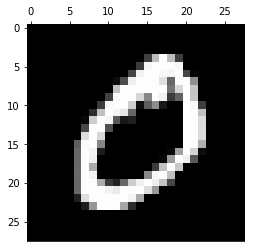

Labels: [5 0 4 ... 5 6 8]
(60000,)
<class 'numpy.ndarray'>


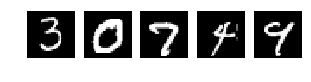

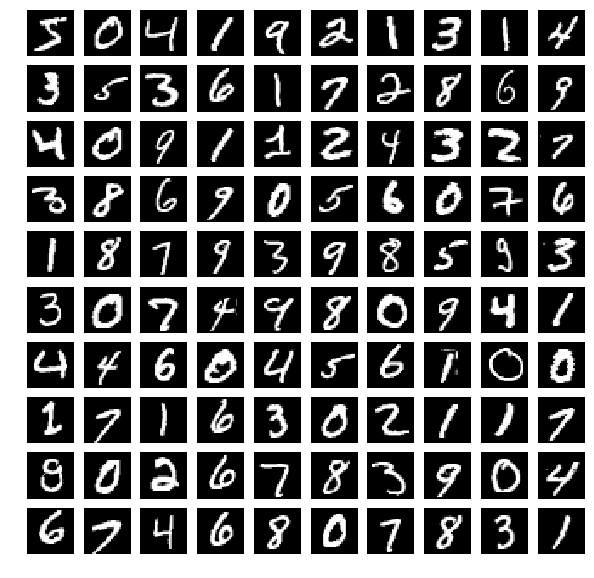

In [8]:
import matplotlib.pyplot as plt  
%matplotlib inline

#show the second mage in training data set
(X, y), (Xtest, ytest) = joy.load_mnist(flatten=False)
joy.show_mnist(X[1])

# show only 51~55th images
joy.show_mnist_grid(X[50:55])

# show the first 100 images by default
print('Labels:', y)
print(y.shape)
print(type(y))
joy.show_mnist_grid(X)

## load_mnist(), save_mnist_csv()

## show_mnist(), show_mnist_grid() 

- MNIST자료를 읽고, 시각화하고, 그 중에 100개만 train100.csv에 저장합니다. 
  100개의 이미지 중에 마지막 이미지를 시각화합니다. 
 
- train100.csv 파일을 읽고 그 중에 첫 2개의 이미지를 시각화 합니다. 

- MNIST자료에서 3개의 이미지를 읽고 레이블과 이미지를 시각화합니다. 

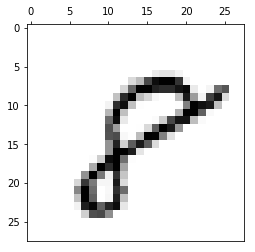

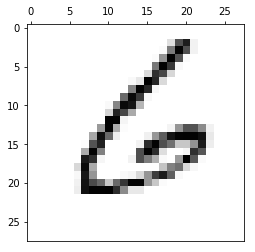

Labels: [5 0 4 ... 5 6 8]
Writing images(data/train100.csv)....

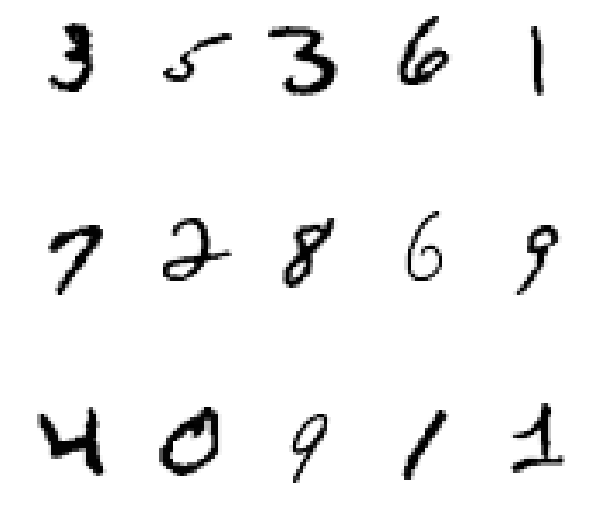

In [9]:
# read images from MNIST dataset, set flatten = False for display
(X, y), (Xtest, ytest) = joy.load_mnist(normalize = False, flatten = False) 

# show the last one among 'howmany' images
joy.show_mnist(X[-1], inverted = True)   
joy.show_mnist(X[-2], inverted = True)   

#show 15 avaliable images among images X, starting at index 10 and in 5 columns
print('Labels:', y)
joy.show_mnist_grid(X[10:25:], inverted = True, ncols=5) # inverted  => 색깔..
joy.save_mnist_csv(X[:100], y[:100], 'train100.csv')

# 과제 
# 이거 잘 예쁘게 출력..?

## read_mnist_csv()

Reading images(data/train100.csv)...100
csv normalized X.shape=(100, 28, 28), y.shape=(100,)
X.shape=(100, 28, 28), y.shape=(100,)


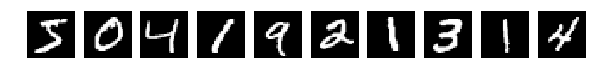

In [10]:
X, y = joy.read_mnist_csv('train100.csv')
print('X.shape={}, y.shape={}'.format(X.shape, y.shape))
joy.show_mnist_grid(X[:10])

## Display images one by one

Label: 5


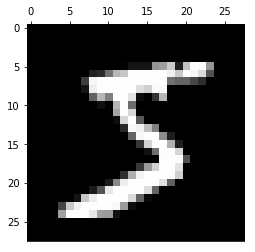

Label: 0


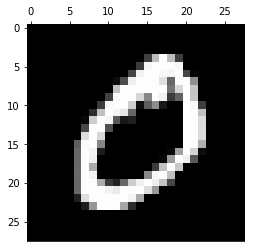

Label: 4


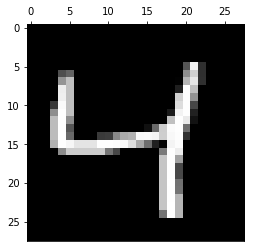

In [11]:
n_images = 3
(X, y), (Xt, yt) = joy.load_mnist(flatten = False)
for i, yi in enumerate(y[:3]):
    print('Label:', yi)
    joy.show_mnist(X[i])

## Rotate images and append them to process

### append_mnist_rotation()
    - MNIST 데이터셋의 첫 5장의 이미지를 선택하여 시각화 한다. 
    - 그 자료 중에 무작위로 선택한 3장의 이미지를 시계방향으로 10도 회전하여 기존의 자료에 추가한다. 
    - 이미지를 시각화하고, 레이블도 출력한다. 

[5 0 4 1 9 0 4 0]


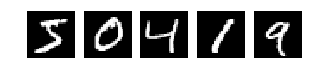

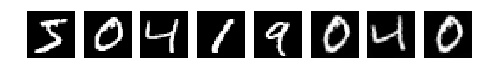

In [12]:
(X, y), (Xtest, ytest) = joy.load_mnist()    # reading mnist dataset
Xo = X[:5].reshape(-1, 28, 28)
yo = y[:5]
joy.show_mnist_grid(Xo.reshape(-1, 28, 28))

Xr, yr = joy.append_mnist_rotation(Xo, yo, 3, 10)
joy.show_mnist_grid(Xr.reshape(-1, 28, 28))
print(yr)

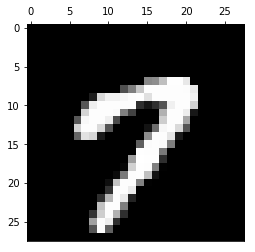

image: 7
predict: [0.    0.002 0.001 0.    0.    0.001 0.    0.979 0.006 0.003]


In [91]:
g = lambda x : 1 / (1 + np.exp(-x))
##mnist feedforwad testing
(X, y) = joy.load_mnist_num(7)
joy.show_mnist(X.reshape(28,28))
W1 = joy.load_mnist_weight('data/w_xh.weights')
Z1 = np.dot(W1, X)
A1 = g(Z1)

W2 = joy.load_mnist_weight('data/w_hy.weights')
Z2 = np.dot(W2, A1)
yhat = g(Z2)

print('image:', y)
print('predict:', np.round_(yhat, 3))

### Histogram of MNIST dataset

In [14]:
(X, y), (Xtest, ytest) = joy.load_mnist()

In [ ]:
# 숙제
# count (x,y) 6만쌍, (Xtest, ytest) 1만쌍인데
# 0부터 9까지 각 몇개일까...->히스토그램
# 느린거와 빠른거...
# 단축시킬 수 있는대로 해보세욤...

In [89]:
%%time
print("도종정정정")

도종정정정
CPU times: user 97 µs, sys: 35 µs, total: 132 µs
Wall time: 277 µs


In [ ]:
%%time


In [ ]:
%%time



# Three layer neural network - Stochastic

Logistic Regression

In [90]:
import joy
(X, y), (Xtest, ytest) = joy.load_mnist()
nn = joy.LogisticNeuron_stochastic(784, 100, 10, eta = 0.2, epochs = 3)  
nn.fit(X, y)       
self_accuracy = nn.evaluate(X, y)
test_accuracy = nn.evaluate(Xtest, ytest)
print('self_accuracy=', self_accuracy)  # 96.35
print('test_accuracy=', test_accuracy)  # 95.15

NameError: name 'joy' is not defined

# Three layer neural network

In [ ]:
nn = joy.NeuralNetwork(net_arch=[2, 4, 1], eta=1.0, epochs=1000)
X = np.array([ [0, 0, 1, 1], [0, 1, 0, 1] ])   # input dataset - col vector     
Y = np.array([0, 1, 1, 0])                     # class labels  - for rcolvector  

nn.fit(X, Y)                                         # train the net

print("Final prediction of all")
A2 = nn.predict(X.T)
for x, yhat in zip(X.T, A2.T):
    print(x, np.round(yhat, 3))

joy.plot_decision_regions(X.T, Y, nn)   
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='best')
plt.show()

In [ ]:
import joy

X, Y = joy.planar_data()            # X, Y = joy.noisy_moons()
joy.plot_xyw(X.T, Y.squeeze())
n_h = 4                            # 은닉층 노드의 수
nn = joy.LogisticNeuron(n_h)             # 클래스 객체 nn을 생성함.
nn.fit(X, Y)                         # 입력 자료 X와 클래스 레이블 Y보내어 가중치를 구함.